In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras import backend as K
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
all_data = pd.read_csv('house_prices.csv')

In [48]:
all_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,6,5,1999,2000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1456,3.044522,4.454347,9.486152,6,6,1978,1988,4.787492,6.673298,5.099866,...,0,0,0,1,0,0,0,0,1,0
1457,4.262680,4.204693,9.109746,7,9,1941,2006,0.000000,5.620401,0.000000,...,0,0,0,1,0,0,0,0,1,0
1458,3.044522,4.234107,9.181735,5,6,1950,1996,0.000000,3.912023,6.937314,...,0,0,0,1,0,0,0,0,1,0


In [3]:
cat_feats = all_data.dtypes[all_data.dtypes == "object"].index
cat_feats

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [4]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
numeric_feats

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [5]:
ordinal_features = ['YrSold']

In [6]:
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
print(skewed_feats)

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')


In [7]:
#log transform the target:
all_data["SalePrice"] = np.log1p(all_data["SalePrice"])

In [8]:
all_data = pd.get_dummies(all_data)

In [9]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [10]:
y = all_data.pop('SalePrice')
ids = all_data.pop('Id')
x = all_data

In [12]:
x = StandardScaler().fit_transform(x)
X_tr, X_val, y_tr, y_val = train_test_split(x, y, random_state = 3)
X_tr.shape

(1095, 288)

In [28]:
model = Sequential()
BatchNormalization()
model.add(Dense(1028,input_dim=288,activation='relu'))
BatchNormalization()
model.add(Dense(1028,input_dim=288,activation='relu'))
BatchNormalization()
#Dropout(0.2)
model.add(Dense(100,input_dim=288,activation='relu'))
BatchNormalization()
#Dropout(0.2)
model.add(Dense(50))
BatchNormalization()
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1028)              297092    
                                                                 
 dense_11 (Dense)            (None, 1028)              1057812   
                                                                 
 dense_12 (Dense)            (None, 100)               102900    
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1,462,905
Trainable params: 1,462,905
Non-trainable params: 0
_________________________________________________________________


In [30]:
hist = model.fit(X_tr, y_tr, validation_data = (X_val, y_val), epochs = 50)

Epoch 1/50
35/35 [==============================] - 2s 35ms/step - loss: 0.9631 - mse: 0.9631 - val_loss: 0.1345 - val_mse: 0.1345
Epoch 2/50
35/35 [==============================] - 1s 34ms/step - loss: 0.0821 - mse: 0.0821 - val_loss: 0.0935 - val_mse: 0.0935
Epoch 3/50
35/35 [==============================] - 1s 23ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0700 - val_mse: 0.0700
Epoch 4/50
35/35 [==============================] - 1s 26ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0709 - val_mse: 0.0709
Epoch 5/50
35/35 [==============================] - 1s 25ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0697 - val_mse: 0.0697
Epoch 6/50
35/35 [==============================] - 1s 30ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0646 - val_mse: 0.0646
Epoch 7/50
35/35 [==============================] - 1s 34ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0619 - val_mse: 0.0619
Epoch 8/50
35/35 [==============================] - 1s 26ms/step - loss: 0.0134 - m

In [31]:
scores = np.sqrt(model.evaluate(X_val,y_val,verbose=0))
scores

array([0.15236219, 0.15236219])

In [32]:
pred = model.predict(X_val)

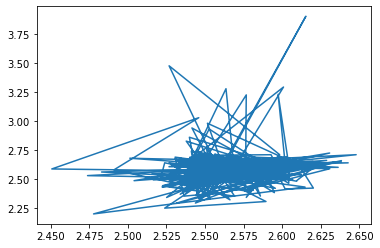

In [44]:
plt.plot(list(y_val), list(pred))

In [46]:
y_val

140     2.537870
950     2.546909
248     2.572667
1360    2.576384
568     2.614867
          ...   
1345    2.533261
999     2.582913
1012    2.566003
314     2.571814
596     2.537529
Name: SalePrice, Length: 365, dtype: float64

In [36]:
pred

array([[2.3767076],
       [2.6025662],
       [2.6037774],
       [2.5004973],
       [2.4300396],
       [2.1983411],
       [2.510384 ],
       [2.3259792],
       [2.5662985],
       [2.5198882],
       [2.4568908],
       [2.484827 ],
       [2.6485586],
       [2.4626293],
       [2.6087697],
       [2.6596813],
       [2.5249653],
       [2.728065 ],
       [2.515942 ],
       [2.4141312],
       [2.6410534],
       [2.5245118],
       [2.485487 ],
       [2.6796622],
       [2.3054988],
       [2.2482448],
       [2.5912971],
       [2.5188656],
       [2.473289 ],
       [2.5416489],
       [2.6030467],
       [2.6056437],
       [2.6691957],
       [2.826424 ],
       [2.64963  ],
       [2.6956875],
       [2.5665169],
       [2.4165266],
       [2.663956 ],
       [2.6287634],
       [2.6234405],
       [2.547968 ],
       [2.632151 ],
       [2.3406656],
       [2.6765773],
       [2.54545  ],
       [2.477593 ],
       [2.4538553],
       [2.483125 ],
       [2.5120847],
